# Figure 5: Denmark Strait freshwater transport adjoint sensitivities

This notebook will reproduce Figure 5 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Jan 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import sys
sys.path.insert(0,'/users/emmomp/Python/ECCOv4-py')
import ecco_v4_py as ecco
import utils as ut
from inputs import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
mean_ssh=xr.open_dataarray(f'{DATA_DIR}/eccov4_meanssh.nc')

In [3]:
ev_2d_all=[]
for year in eyears:
    ev_2d=[]
    for var in ecco_convs_2d['OCE']:
        foo=xr.open_dataarray(f'{EV_DIR}/{year}/horflux_fw_denm_fullEV2d_{var}_{year}.nc')
        foo.name=var
        ev_2d.append(foo)
    ev_2d=xr.merge(ev_2d).assign_coords({'eyear':year})
    ev_2d_all.append(ev_2d)
ev_2d=xr.concat(ev_2d_all,'eyear',coords='minimal')
ev_2d['wind_OCE']=ev_2d['adxx_tauuXoceTAUU']+ev_2d['adxx_tauvXoceTAUV']

In [4]:
xmin,xmax,ymin,ymax=(-2266791.253073855,
 3358349.2597455736,
 -2166791.253073855,
 3458349.2597455736)
proj_dict={'projection_type':'ortho','user_lon_0':-45,'user_lat_0':70}
my_projn = ccrs.Orthographic(central_longitude=-45,central_latitude=70)
[section_pt1,section_pt2]=ecco.get_section_endpoints('Denmark Strait')
plotvars=['adxx_qnetXoceQnet','adxx_empmrXoceFWflx','wind_OCE']
clims=dict(zip(plotvars,
               [[1e-13,0.5e-13,0.5e-13,3e-14],
                [1e-16,1e-16,1e-16,1e-16],
                [6e-12,5e-13,2e-13,1.5e-13]]))
fig_labels=dict(zip(plotvars,['qnet','empmr','windOCE']))
fig_titles=dict(zip(plotvars,['Heat Flux','Fresh Water Flux','Wind Stress']))

lag_labels = [
    "0 to -3m lag",
    "-3m to -6m lag",
    "-6m to -18m lag",
    "-18m to -4 y lag",
    "0 to -4 y lag",
]

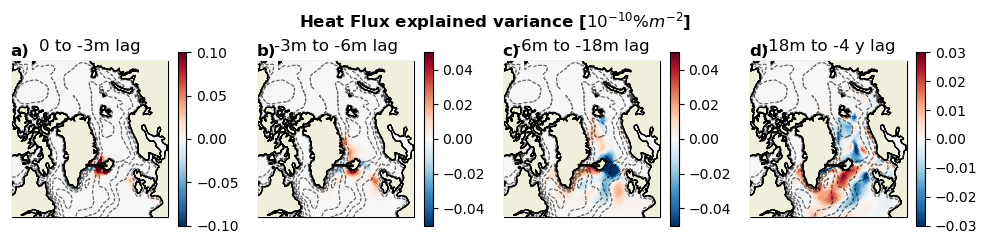

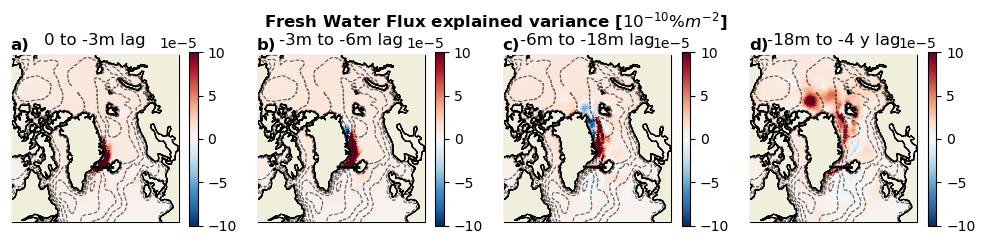

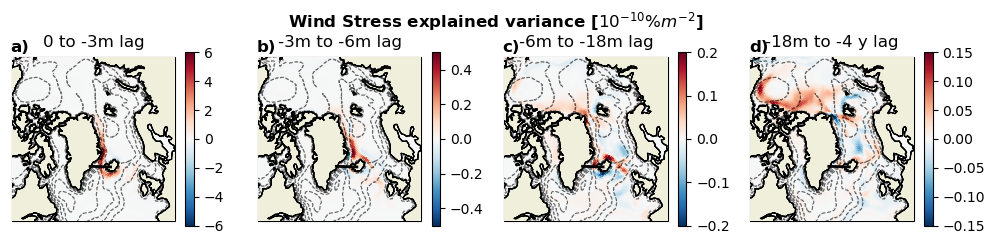

In [5]:
for ivar,var in enumerate(plotvars):
    fig=plt.figure(figsize=[10,6.5])
    pp=1
    for ilag in range(0,4):
        [f,ax,p]=ut.plot_ecco(ecco_grid,ev_2d[var].isel(lag=ilag).mean('eyear')*1e12,subplot_grid=[3,4,pp],
                     cmin=-clims[var][ilag]*1e12,cmax=clims[var][ilag]*1e12,
                     cmap='RdBu_r',**proj_dict,rasterized=True)
        [f,ax,p]=ut.plot_ecco(ecco_grid,mean_ssh,ax=ax,
                                  plot_type='contour',colors='k',mapping_method='bin_average',
                                  cmap=None,negative_linestyles='dashed',linewidths=0.8,
                                  levels=np.arange(-1.4,0,0.10),show_colorbar=False,alpha=0.6,
                                  **proj_dict)
        ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
                 color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
        plt.gca().set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        plt.title(lag_labels[ilag],y=1.01)     
        plt.text(-0.01,1.03,f'{chr(97+ilag)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        pp+=1
    plt.suptitle(f'{fig_titles[var]} explained variance [$10^{{-10}}\% m^{{-2}}$]',fontsize=12,fontweight='bold',y=0.96)
    plt.tight_layout()
    plt.savefig(f'../plots/fig5_{fig_labels[var]}_meanevtotal_bylag_spatial.pdf',bbox_inches='tight')